In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
df = df[df['airline_sentiment'] != 'neutral']
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 11541 labelled examples.


In [11]:
from lib import processing

data = processing.process_data(df)

Using a total of 11541 tweets


In [12]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(data, sentim_analyzer, min_freq = 20)

Unigram features 1196
Bigram features:  1117


## Linear SVC

In [14]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier

evaluations = []
c_range = [0.25, 0.5, 1, 2, 4]
for c in c_range: 
    trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                         C = c,
                                        )).train,
    }
    print("-------------------------------")
    print("Training with C = ", c)
    e = classify.train_model(data, sentim_analyzer, trainer, sample_size = 3000)
    evaluations.append(e)



-------------------------------
Training with C =  0.25
Training: Linear SVC Classifier
Sampled 3000 elements
	Training fold 1
Training classifier
	Evaluating fold 1
Evaluating SklearnClassifier results...
	Training fold 2
Training classifier
	Evaluating fold 2
Evaluating SklearnClassifier results...
	Training fold 3
Training classifier
	Evaluating fold 3
Evaluating SklearnClassifier results...
	Training fold 4
Training classifier
	Evaluating fold 4
Evaluating SklearnClassifier results...
	Training fold 5
Training classifier
	Evaluating fold 5
Evaluating SklearnClassifier results...
	Training fold 6
Training classifier
	Evaluating fold 6
Evaluating SklearnClassifier results...
	Training fold 7
Training classifier
	Evaluating fold 7
Evaluating SklearnClassifier results...
	Training fold 8
Training classifier
	Evaluating fold 8
Evaluating SklearnClassifier results...
	Training fold 9
Training classifier
	Evaluating fold 9
Evaluating SklearnClassifier results...
	Training fold 10
Training

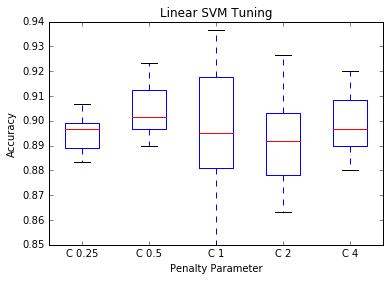

In [15]:
eval_data = [[evaluations[j][i]['Accuracy'] for j in range(len(c_range))] for i in range(10)]
eval_df = pandas.DataFrame(eval_data, columns = ["C " + str(x) for x in c_range])
eval_df.plot.box()
plt.xlabel("Penalty Parameter")
plt.ylabel("Accuracy")
plt.title("Linear SVM Tuning")

In [16]:
from IPython.display import display, HTML

summary_accuracy =  eval_df.mean(axis = 0).round(4) * 100
final_df = pandas.DataFrame(list(zip(c_range, summary_accuracy)), columns=["C", "Accuracy"])
HTML(final_df.to_html())

,C,Accuracy
0,0.25,89.50
1,0.50,90.53
2,1.00,89.57
3,2.00,89.33
4,4.00,89.87


# Concluzie

### Valoarea optima pentru C este 0.5
